# Multivariate Data
## Multivariate Gaussian
In the first chapter we disccused about Gaussians, specifically for 1D data, as well as binary classfication. We will now go into Multi Dimenstional Data and multivariate Gaussian. When we only had one dimension life was easier with a distburtion following the form $ p(x) = \frac{1}{\sqrt{2\pi}\sigma}exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)$. But before we had our dataset being N size, $X= [x_0,x_1,...,x_N]^T$. But now we have d dimensions as well:

$$ X = \begin{bmatrix} x_{0,0} & x_{0,1} & ... & x_{0,d} \\
                \vdots & \vdots & \ddots & \vdots \\  
                   x_{N,0} & x_{N,1} & ... & x_{N,d}  \\ 
\end{bmatrix}$$


This leads to a multivariate Gaussian which is commanly given as:


$$p(x) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp (-\frac{(x-\mu)^T\Sigma^{-1}(x-\mu)^T}{2})  $$

You can see this is a more general form of the 1D case where $ \frac{(x-\mu)^2}{2\sigma^2} = \frac{1}{2}(x-\mu)\sigma^{-2}(x-\mu)$. The Major difference being $\sigma$ be replaced with $\Sigma$ which is called the covariance matrix. As well as x being multi dimension and $\mu$ being multi dimensional as well.


Finding the maximum liklehood of this gaussian you find that the mean becomes: $E[x] = \mu = [\mu_0,...,\mu_d] $. Where $\mu_d$ is the d dimension mean of the dataset, using the same formula as the 1D case but for each dimension For the variance we have what is known as the covaraince matrix which for two different variables $X_j$ and $X_i$ you get: 

$$ \sigma_{i,j} \equiv COV(X_i,X_j) = E[(X_i-\mu_i)(X_j-\mu_j)] $$
 
The Covariance matrix tells you how two variables are related in a linear way. If $\sigma_{i,j}$ is positive or negative then this will tell you that their realtionship is postive or negative slope respectively. If the variables are indepdent then the covariance matrix is 0. However this is not true the other way as you can have non linear variables that are not indepdent but still have a 0 covariance matrix. 

Normalizing the covariance matrix gives you the cross correaltion(giving limits of -1 & +1):

$$ CORR(X_i,X_J) \equiv \frac{\sigma_{i,j}}{\sigma_i \sigma_j}   $$


In our case we want to find the maximum likeliehood of the Variance of the multirviate gaussian which gives $COV(X,X)$ which is:

$$\Sigma =COV(X) = E[(X-\mu)(X-\mu)^T = \begin{bmatrix} \sigma_0^2 & \sigma_{01} & ... & \sigma_{0d} \\
                \vdots & \vdots & \ddots & \vdots \\  
                   \sigma_{d0} & \sigma_{d1} & ... & \sigma_d^2  \\ 
\end{bmatrix} $$


Where each $\sigma_{i,j}$ can be estimated using maximum liklehood similar to 1D classfication but for each dimension,  $\sigma_{i,j} \sim \frac{\sum^N_{t=0} (x_i-m_i)(x_j-m_j)}{N}$. (note the default numpy cov function uses a biased version of cov using N-1 instead of N, but if your population is large enough this will not make much difference to the results).


Different covairances give different shapes but messing around with the covariances you find that the diagonals control the elipise natural of the Gaussian(Which makes sense, more vairance in 1 dimension will cause more data to spread out in that dimension). The off digonals control the rotation of the Gaussian. These can be seen below.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

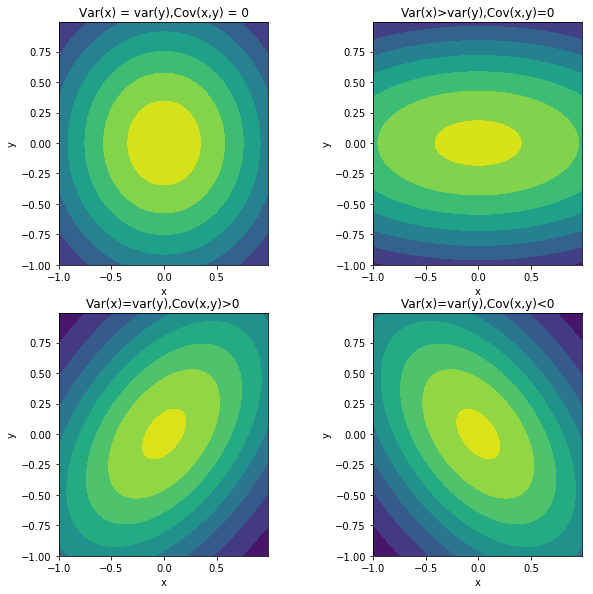

In [81]:
covlist = [[[1,0],[0,1]],[[5,0],[0,1]],[[1,0.5],[0.5,1]],[[1,-0.5],[-0.5,1]]]
covname = ["Var(x) = var(y),Cov(x,y) = 0","Var(x)>var(y),Cov(x,y)=0","Var(x)=var(y),Cov(x,y)>0",
          "Var(x)=var(y),Cov(x,y)<0"]
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y



fig, axes = plt.subplots(2,2,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2,wspace=0.5)


for ax,cl,cn in zip(axes.ravel(),covlist,covname):
    

    rv = multivariate_normal([0, 0], cl )
    ax.contourf(x, y, rv.pdf(pos))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(cn)


## Multivariate Classification
Again as Gaussian tend to be naturally occuring phenomena a good approximation is assuming that our class of conditonal densities $p(x|C_i)$ is a multivariate normal density $N(\mu_i,\Sigma_i)$:



$$p(x|C_i) = \frac{1}{(2\pi)^{d/2}|\Sigma_i|^{1/2}} \exp (-\frac{(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)^T}{2})  $$


Now assuming that each class is made up of a a seperate Gaussian similar to the 1D case we can now find the posterior proability $p(C_i|x)$ using Bayes Theorem:

$$ p(C_i|x)= \frac{p(x|C_i)P(C_i)}{\sum^K_{k=0} p(x|C_i)P(C_i)}$$

Note that this may not always be the case and that a class might be made up of multiple gaussians. For this you must dive into mixture models, which will be discussed in later chapters. 



## Linear and  Quadratic Discriminant Analysis
Ignoring the Bottom sum of Bayes Theorm for the mean time we can find a discriminant function, which shows some insight on how the classes are seperated. Taking the log of $p(x|C_i)P(C_i)$ can also simplify these function, which leads to:

$$ g_i(x) = \frac{d}{2}log2\pi-\frac{1}{2}log|\Sigma_i|+\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)^T+logP(C_i) $$

Where $\Sigma_i$ is the covariance for each class, $\mu_i$ is the mean of each dimension of each class and $P(C_i) is the prior proability of the class. 

### Quadratic Discriminant

If you removed the prior probaility then you would have log probability of the maximum liklehood variables determined for class i. Expanding this out and ignoring the first constant we get:


\begin{align}
g_i(x) &= -\frac{1}{2}log|\Sigma_i|+\frac{1}{2}(x^T\Sigma_i^{-1}x-2x^T\Sigma_i^{-1}\mu_i+\mu_i^T\Sigma_i^{-1}\mu_i)+logP(C_i)  \\
    &= x^TW_ix+W_i^Tx+w_{i0}
\end{align}

where $W_i = -\frac{1}{2}\Sigma_i^{-1}$, $w_i = \Sigma_i^{-1}\mu_i$ and $w_{i0} = -\frac{1}{2}\mu_i^T\Sigma_i^{-1}\mu_i-\frac{1}{2}log|\Sigma_i|+logP(C_i) $

As you can see this is a Quadratic function and also known as the quadratic Dicriminant. By finding the covariance matrix of each class we can obtain a estitimate of each class Gaussian and probaility of what class a data point belongs too. I have written below some code implementing the qudratic discrimiant and also plotting respective class Gaussian and Probaility of a data point being in a certain class.


In [ ]:
#Making Data
from sklearn.datasets import make_blobs
# from mpl_toolkits.mplot3d import Axes3D

#Make random blobs of data
np.random.seed(10)
X, Y = make_blobs(100,centers = 2, cluster_std = 1, center_box = (-7,7))


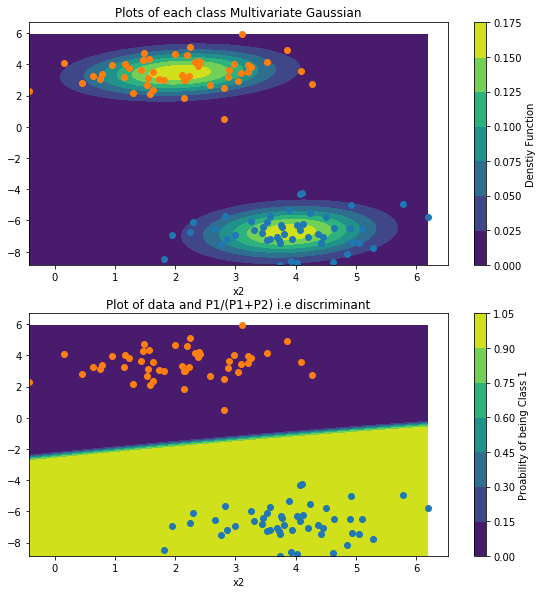

In [100]:
####Qudratic discriminat training#####
#determine max liklehood of latent variables
m1 = np.mean(X[Y==0],axis=0)
m2 = np.mean(X[Y==1],axis=0)
s1 = np.cov(X[Y==0],rowvar=False)
s2 = np.cov(X[Y==1],rowvar=False)

#Make up data for plotting
x, y = np.mgrid[min(X[:,0]):max(X[:,0]):.01, min(X[:,1]):max(X[:,1]):.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
#get distburtion of data based on max liklehood variables
P1 = multivariate_normal(m1, s1 ).pdf(pos)
P2 = multivariate_normal(m2, s2 ).pdf(pos)


#Plottig each class distrbution
fig, axes = plt.subplots(2,1,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)
axes[0].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[0].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c1 = axes[0].contourf(x, y, P1+P2)
axes[0].set_xlabel("x1")
axes[0].set_xlabel("x2")
axes[0].set_title("Plots of each class Multivariate Gaussian")
cb1 = fig.colorbar(c1, ax=axes[0])
cb1.ax.set_ylabel("Denstiy Function (P1 & P2)")

#plotting the discrement of the classes
axes[1].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[1].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c2 = axes[1].contourf(x, y, P1/(P1+P2))
axes[1].set_xlabel("x1")
axes[1].set_xlabel("x2")
axes[1].set_title("Plot of data and P1/(P1+P2) i.e discriminant")
cb2 = fig.colorbar(c2, ax=axes[1])
cb2.ax.set_ylabel("Proability of being Class 1")

# fig = plt.figure()
# ax = fig.add_subplot(111,projection='3d')
# ax.plot_surface(x,y,P2+P1)
# # ax.plot_surface(x,y,P1)

As it can be seen in the plots the gaussian fit nicely with each class and the dsicrimant in figure 2 has a clear cut on when going to class 1 region and class 2 region. Can also see that the line dividing the regions is not a straight line(linear) but a curve as expected. In this case it is a pretty good fit, however in certain cases the quadratic Discrimiant can overfit the data. Also when the dimensions are large and the samples are small the qudratic Discimiant can be unstable due to a inverse of $\Sigma$ not existing or being too small. From this we can move to simplier models. 

### Linear Discriminant - full common covairance

We can pull all the classes covariances together to form one Sigma $\Sigma = \Sum_i P(C_i)\Sigma_i$. This gives all classes the same covariance and leads the discimant to be:



\begin{align}
g_i(x) &= -\frac{1}{2}log|\Sigma_i|+\frac{1}{2}(x^T\Sigma_i^{-1}x-2x^T\Sigma_i^{-1}\mu_i+\mu_i^T\Sigma_i^{-1}\mu_i)+logP(C_i)  \\
    &= x^TW_ix+W_i^Tx+w_{i0}
\end{align}

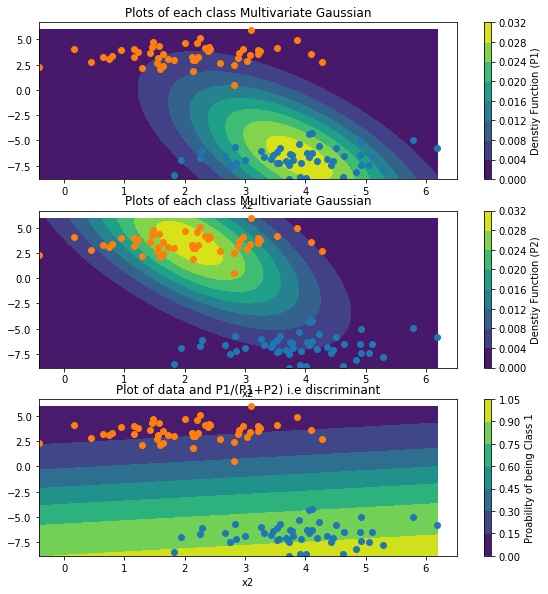

In [104]:
####Linear discriminat training- full common covairance#####
S=np.cov(X,rowvar=False)
P1 = multivariate_normal(m1, S ).pdf(pos)
P2 = multivariate_normal(m2, S ).pdf(pos)

fig, axes = plt.subplots(3,1,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)

#Plottig each class distrbution
axes[0].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[0].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c1 = axes[0].contourf(x, y, P1,origin="lower")
axes[0].set_xlabel("x1")
axes[0].set_xlabel("x2")
axes[0].set_title("Plots of each class Multivariate Gaussian")
cb1 = fig.colorbar(c1, ax=axes[0])
cb1.ax.set_ylabel("Denstiy Function (P1)")


axes[1].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[1].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c1 = axes[1].contourf(x, y, P2,origin="lower")
axes[1].set_xlabel("x1")
axes[1].set_xlabel("x2")
axes[1].set_title("Plots of each class Multivariate Gaussian")
cb1 = fig.colorbar(c1, ax=axes[1])
cb1.ax.set_ylabel("Denstiy Function (P2)")


#plotting the discrement of the classes
axes[2].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[2].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c2 = axes[2].contourf(x, y, P1/(P1+P2))
axes[2].set_xlabel("x1")
axes[2].set_xlabel("x2")
axes[2].set_title("Plot of data and P1/(P1+P2) i.e discriminant")
cb2 = fig.colorbar(c2, ax=axes[2])
cb2.ax.set_ylabel("Proability of being Class 1")

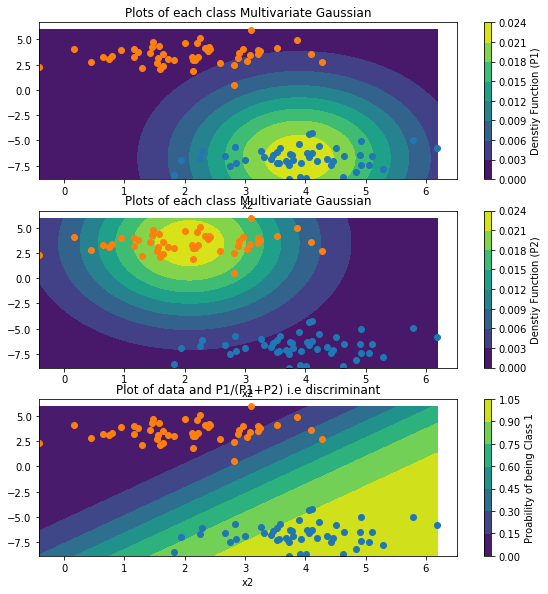

In [105]:
####Linear discriminat training- diagonal common covairance#####
S=np.cov(X,rowvar=False)*np.identity(X.shape[1])
P1 = multivariate_normal(m1, S ).pdf(pos)
P2 = multivariate_normal(m2, S ).pdf(pos)

fig, axes = plt.subplots(3,1,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)

#Plottig each class distrbution
axes[0].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[0].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c1 = axes[0].contourf(x, y, P1,origin="lower")
axes[0].set_xlabel("x1")
axes[0].set_xlabel("x2")
axes[0].set_title("Plots of each class Multivariate Gaussian")
cb1 = fig.colorbar(c1, ax=axes[0])
cb1.ax.set_ylabel("Denstiy Function (P1)")


axes[1].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[1].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c1 = axes[1].contourf(x, y, P2,origin="lower")
axes[1].set_xlabel("x1")
axes[1].set_xlabel("x2")
axes[1].set_title("Plots of each class Multivariate Gaussian")
cb1 = fig.colorbar(c1, ax=axes[1])
cb1.ax.set_ylabel("Denstiy Function (P2)")


#plotting the discrement of the classes
axes[2].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[2].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c2 = axes[2].contourf(x, y, P1/(P1+P2))
axes[2].set_xlabel("x1")
axes[2].set_xlabel("x2")
axes[2].set_title("Plot of data and P1/(P1+P2) i.e discriminant")
cb2 = fig.colorbar(c2, ax=axes[2])
cb2.ax.set_ylabel("Proability of being Class 1")

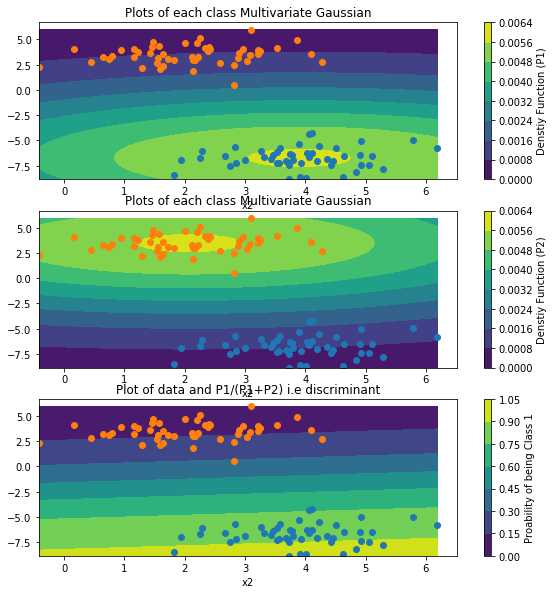

In [106]:
####Linear discriminat training- diagonal single covairance#####
S = np.linalg.norm(np.cov(X,rowvar=False))*np.identity(X.shape[1])
P1 = multivariate_normal(m1, S ).pdf(pos)
P2 = multivariate_normal(m2, S ).pdf(pos)

fig, axes = plt.subplots(3,1,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)

#Plottig each class distrbution
axes[0].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[0].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c1 = axes[0].contourf(x, y, P1,origin="lower")
axes[0].set_xlabel("x1")
axes[0].set_xlabel("x2")
axes[0].set_title("Plots of each class Multivariate Gaussian")
cb1 = fig.colorbar(c1, ax=axes[0])
cb1.ax.set_ylabel("Denstiy Function (P1)")


axes[1].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[1].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c1 = axes[1].contourf(x, y, P2,origin="lower")
axes[1].set_xlabel("x1")
axes[1].set_xlabel("x2")
axes[1].set_title("Plots of each class Multivariate Gaussian")
cb1 = fig.colorbar(c1, ax=axes[1])
cb1.ax.set_ylabel("Denstiy Function (P2)")


#plotting the discrement of the classes
axes[2].plot(X[:,0][Y==0],X[:,1][Y==0],'o')
axes[2].plot(X[:,0][Y==1],X[:,1][Y==1],'o')
c2 = axes[2].contourf(x, y, P1/(P1+P2))
axes[2].set_xlabel("x1")
axes[2].set_xlabel("x2")
axes[2].set_title("Plot of data and P1/(P1+P2) i.e discriminant")
cb2 = fig.colorbar(c2, ax=axes[2])
cb2.ax.set_ylabel("Proability of being Class 1")

In [107]:
S

array([[ 28.05968149,   0.        ],
       [  0.        ,  28.05968149]])

## Example Code using Diabetes test set
Here I am doing a 8 dimension classsfication problem using real data from the Pima Indian diabetes data set.  

In [14]:
df = pd.read_csv('Data/pima-indians-diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
Data = df.values
#split Data to training(70%) and valdation
ind = int(Data.shape[0]*0.7)
Ytrain = Data[:ind,-1]
Xtrain = Data[:ind,:-1]
Yval = Data[ind:,-1]
Xval = Data[ind:,:-1]


##doing it by hand###
#Doing Gaussian By hand instead of using scipy.stats
def gaussian(x, mean, cov):
	xmset=(x-mean)
	#dimension size
	d=xmset.shape[1]
	px=np.zeros(xmset.shape[0])
	for i,xm in enumerate(xmset):
		px[i] = 1/np.sqrt((2*np.pi)**d*np.linalg.det(cov))*np.exp(-(np.dot(np.dot(xm, np.linalg.inv(cov)), xm.T))/2)
	return px

def classify(liklehoods1, liklehoods2):
	C1 = liklehoods2/(liklehoods2+liklehoods1)
	C1[C1<=0.5] = 0
	C1[C1>0.5] = 1
	return C1


#Define multi dimensional gassuain
from scipy.stats import multivariate_normal as MN



####Qudratic discriminat training#####
m1 = np.mean(Xtrain[Ytrain==0],axis=0)
m2 = np.mean(Xtrain[Ytrain==1],axis=0)
s1 = np.cov(Xtrain[Ytrain==0],rowvar=False)
s2 = np.cov(Xtrain[Ytrain==1],rowvar=False)

#Output Gaussian dsitrbutions or liklehoods 
#Given a set x
# I.e P(x|C1) and P(x|C2)=Gaussian
P1 = gaussian(Xval,m1,s1)
P2 = gaussian(Xval,m2,s2)
#Can us inbuilt scipy function to also do it
#P1 = MN.pdf(Xtrain,mean=m1,cov=s1)

#classifcation 
C1 = classify(P1,P2)
print("accuarcy: ", np.mean(C1 == Yval))


####Linear discriminat training- full common covairance#####
#find covariance of all data
s = np.cov(Xtrain,rowvar=False)
S=s
C1 = classify(gaussian(Xval,m1,S),gaussian(Xval,m2,S))
print("accuarcy: ", np.mean(C1 == Yval))

####Linear discriminat training- diagonal common covairance#####
#find covariance of all data
S = s*np.identity(Xtrain.shape[1])
C1 = classify(gaussian(Xval,m1,S),gaussian(Xval,m2,S))
print("accuarcy: ", np.mean(C1 == Yval))

####Linear discriminat training- diagonal single covairance#####
#find covariance of all data
S = np.linalg.norm(s)*np.identity(Xtrain.shape[1])
C1 = classify(gaussian(Xval,m1,S),gaussian(Xval,m2,S))
print("accuarcy: ", np.mean(C1 == Yval))


accuarcy:  0.757575757576
accuarcy:  0.800865800866
accuarcy:  0.770562770563
accuarcy:  0.588744588745


# Multivariate Regression


# Logistic Regression
Logistic regression is a little different to fitting some equation. Though the concepts are similar, instead of a range of y data we have a binary classfication option of either 1 or 0. The sigmoid function is 